In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# laplacian(phi) = f

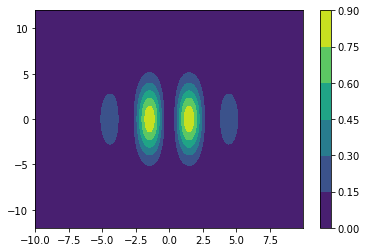

In [3]:
X, Y = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-12, 12, 0.01))
f = np.exp(-(X**2 + Y**2) / 15) * np.sin(X)**2

plt.contourf(X, Y, f)
plt.colorbar()

In [4]:
fhat = np.fft.fft2(f)
f.shape

(2400, 2000)

In [5]:
#q = np.arange(f.shape[0])[:,np.newaxis]
#p = np.arange(f.shape[1])[np.newaxis,:]

dx = X[0,1] - X[0,0]
dy = Y[1,0] - Y[0,0]
p = np.fft.fftfreq(f.shape[1], d=dx)[np.newaxis,:]
q = np.fft.fftfreq(f.shape[0], d=dy)[:,np.newaxis]

#Ly = Y.max() - Y.min()
#Lx = X.max() - X.min()
factor = (-1.j * 2*np.pi * p) ** 2 + (-1.j * 2*np.pi * q) ** 2 

In [6]:
factor[0,0] = -1
#phihat = np.fft.ifftshift(np.fft.fftshift(fhat) / factor)
#phihat = fhat / np.fft.ifftshift(factor)

phihat = fhat / factor
phihat[0,0] = 0

In [7]:
phi = np.fft.ifft2(phihat).real
phi

array([[1.16480046, 1.16479964, 1.16479719, ..., 1.16479311, 1.16479719,
        1.16479964],
       [1.16479882, 1.164798  , 1.16479556, ..., 1.16479147, 1.16479556,
        1.164798  ],
       [1.16479391, 1.16479309, 1.16479064, ..., 1.16478656, 1.16479064,
        1.16479309],
       ...,
       [1.16478572, 1.1647849 , 1.16478246, ..., 1.16477838, 1.16478246,
        1.1647849 ],
       [1.16479391, 1.16479309, 1.16479064, ..., 1.16478656, 1.16479064,
        1.16479309],
       [1.16479882, 1.164798  , 1.16479556, ..., 1.16479147, 1.16479556,
        1.164798  ]])

Text(0.5, 1.0, 'f')

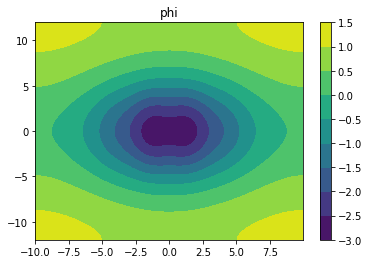

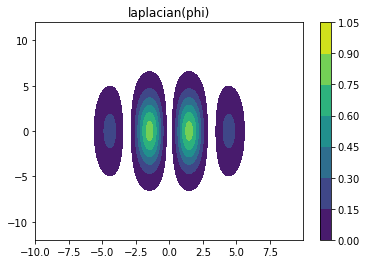

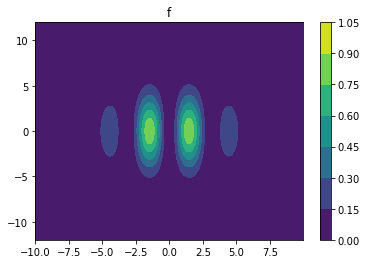

In [8]:
def laplacian2d(phi, h):
    dphidx2 = (np.roll(phi, shift=-1, axis=1) - 2*phi + np.roll(phi, shift=1, axis=1)) / (h**2)
    dphidy2 = (np.roll(phi, shift=-1, axis=0) - 2*phi + np.roll(phi, shift=1, axis=0)) / (h**2)
    return dphidx2 + dphidy2
    

plt.contourf(X, Y, phi)
plt.colorbar()
plt.title('phi')

plt.figure()
plt.contourf(X, Y, laplacian2d(phi, h=dx), levels=np.arange(0, 0.9+0.15, 0.15))
plt.colorbar()
plt.title('laplacian(phi)')

plt.figure()
plt.contourf(X, Y, f, levels=np.arange(0, 0.9+0.15, 0.15))
plt.colorbar()
plt.title('f')

# Use `rfft` (instead of `fft`)

In [20]:
# 跟前面的一樣，只是從fft改成用rfft
# 因為input的資料是實數，所以改用rfft，可以節省時間&空間

In [21]:
# laplacian(phi) = f

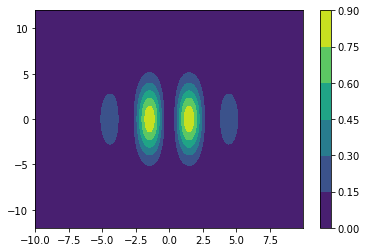

In [29]:
X, Y = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-12, 12, 0.01))
f = np.exp(-(X**2 + Y**2) / 15) * np.sin(X)**2

plt.contourf(X, Y, f)
plt.colorbar()

In [30]:
fhat = np.fft.rfft2(f)   # the right-most dimension will be truncated
f.shape, fhat.shape

((2400, 2000), (2400, 1001))

In [24]:
dx = X[0,1] - X[0,0]
dy = Y[1,0] - Y[0,0]
p = np.fft.rfftfreq(nx, d=dx)[np.newaxis,:]   # the right-most dimension will be truncated
q = np.fft.fftfreq(f.shape[0], d=dy)[:,np.newaxis]

factor = (-1.j * 2*np.pi * p) ** 2 + (-1.j * 2*np.pi * q) ** 2 

In [25]:
factor[0,0] = -1
phihat = fhat / factor
phihat[0,0] = 0

In [41]:
phi = np.fft.irfft2(phihat, s=f.shape)
phi

array([[1.16480046, 1.16479964, 1.16479719, ..., 1.16479311, 1.16479719,
        1.16479964],
       [1.16479882, 1.164798  , 1.16479556, ..., 1.16479147, 1.16479556,
        1.164798  ],
       [1.16479391, 1.16479309, 1.16479064, ..., 1.16478656, 1.16479064,
        1.16479309],
       ...,
       [1.16478572, 1.1647849 , 1.16478246, ..., 1.16477838, 1.16478246,
        1.1647849 ],
       [1.16479391, 1.16479309, 1.16479064, ..., 1.16478656, 1.16479064,
        1.16479309],
       [1.16479882, 1.164798  , 1.16479556, ..., 1.16479147, 1.16479556,
        1.164798  ]])

Text(0.5, 1.0, 'f')

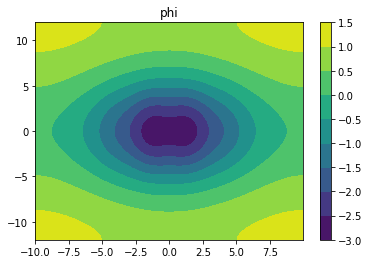

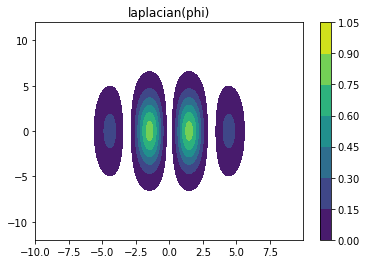

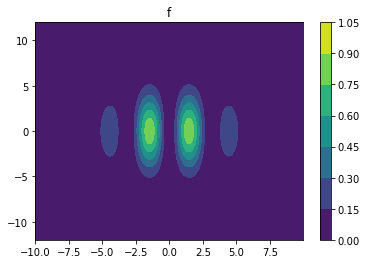

In [42]:
def laplacian2d(phi, h):
    dphidx2 = (np.roll(phi, shift=-1, axis=1) - 2*phi + np.roll(phi, shift=1, axis=1)) / (h**2)
    dphidy2 = (np.roll(phi, shift=-1, axis=0) - 2*phi + np.roll(phi, shift=1, axis=0)) / (h**2)
    return dphidx2 + dphidy2
    

plt.contourf(X, Y, phi)
plt.colorbar()
plt.title('phi')

plt.figure()
plt.contourf(X, Y, laplacian2d(phi, h=dx), levels=np.arange(0, 0.9+0.15, 0.15))
plt.colorbar()
plt.title('laplacian(phi)')

plt.figure()
plt.contourf(X, Y, f, levels=np.arange(0, 0.9+0.15, 0.15))
plt.colorbar()
plt.title('f')

# 1d case

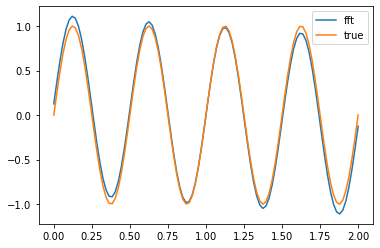

In [195]:
Lx = 2
N = 100
x = np.linspace(0, Lx, N)
f = -16 * np.pi**2 * np.sin(4*np.pi*x)

fhat = np.fft.fft(f)

p = np.fft.fftfreq(N, d=x[1]-x[0]) * Lx
factor = (-1j*2*np.pi*p / Lx)**2
factor[np.isclose(p, 0)] = -1
uhat = fhat / factor
uhat[0] = 0
u = np.fft.ifft(uhat).real

plt.plot(x, u, label='fft')
plt.plot(x, np.sin(4*np.pi*x), label='true')
plt.legend()